<a href="https://colab.research.google.com/github/hchang18/computer-vision/blob/main/hw1_haeyoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EE510 Computer Vision**

**Homework 1**

Haeyoon Chang

0. Preparation for image processing

In [ ]:
# import libraries 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# mount the google drive to get my image
from google.colab import drive
drive.mount('/content/gdrive')

# function to load the image 
def load_img():
    img = cv2.imread(F'/content/gdrive/My Drive/Colab Notebooks/ComputerVision/tiles.jpg').astype(np.float32) / 255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


# function to display an image
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

# function to display two images side by side 
def display_side(img1, img2):
    fig = plt.figure(figsize=(12, 10))
    ax=fig.add_subplot(121)
    ax.imshow(img1)
    ax=fig.add_subplot(122)
    ax.imshow(img2)

# load the image
img = load_img()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


1. Smooth the image: 
    - Specify the kernel function that you used for smoothing
        - I used Gaussian kernel function for smoothing
    - State the aspect ratio of the image 
        - H: 2880, W: 2160, Color Channels: 3
    - Smooth the image and show the smoothed image side by side 
      with original image 
        - Please see below
    - Provide a justification for how you handled the three color channels
        - OpenCV color is formatted in BGR so I convert it to RGB to 
        be able to show the image in its original color scheme in matplotlib
        - All three color channels are convolved with the kernel. 
        - If I apply different kernels to different channels, the complementary 
        colors of each color channel (RGB) would have been emphasized. 
    - Explain how you handled border effects and justify your decisions
        - Reflective border type is a good choice because the image shows my 
        backyard and it is safe to assume similar pattern continues (fence,
        tree and nextdoor house) beyond what's on the image. 
    - Provide a justification for the parameter values that you choose
      for the kernel function, such as the size (width and height) in units
      of pixels
      - Kernel size: Given the large image size (3264 x 2448), small sized
        kernels such as 3x3 and 5x5 did not effectively blur the image. I chose 
        kernel size to be 15x15 so that we can see a clear blurring effect in this notebook. 
      - The sigma values in the Gaussian filter implies that there are some
       variation around its mean value. The larger the sigma values in both
       x and y, blurrier the image gets. 
  

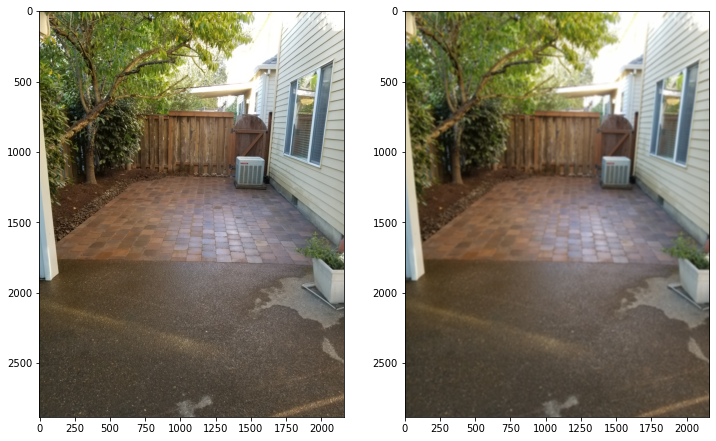

In [ ]:
# Gaussian Kernel
blurred_backyard = cv2.GaussianBlur(img,ksize=(15,15),sigmaX=10, sigmaY=10, borderType=4)
display_side(img, blurred_backyard)

# other kernel functions we can use
dst_blur = cv2.blur(img, ksize=(15,15),borderType=4) # same as customized kernel (averaging)
dst_median = cv2.medianBlur(img,5)

2. Sharpen the image
    - Sharpen the image and show the sharpened image side by side with the original image
        - Please see below
    - Explain fully how you sharpened the signal
        - Sharpened image = Original + Sharpen_Force * (Original - Blurred)
            - Smoothe the original image and make it blurry 
            - Subtract blurred image from the original image and keep the difference
            - Finally, add the difference back to the original image 
            - we can sharpen the image by increasing sharpening factor
        - Blurred image is from Question 1
        - Compared to another sharpening filter: 
            - that uses 2D filter which amplifies center value, while slightly reducing the values in its left, right, top, down pixels
            - The sharpened image from this method was brighter than the original whereas the one I used made the image slightly darker than the original image
    - Provide a justification for how you handled the three color channels
        - I kept the color channels as they are because I wanted it to be compatible with image blurring process 
    - Explain how you handled border effects and justify your decisions
        - The blurred image was from the question 1, thus, I think the sharpened image is somewhat affected by reflective border
        - However, we did not have to do any border effect on the original image as sharpening technique only required arithmetic operations on matrices (they are all the same size)
    - Provide a justification for the parameter values that you chose for the kernel function, such as the size (width and height) in units of pixels
        - Kernel size used for blurring the image is 15x15 (as in question 1)
        - Sharpening force: This variable determines how much contrast we want in the image. For this example, any number above 4 looked unnatural for human eyes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


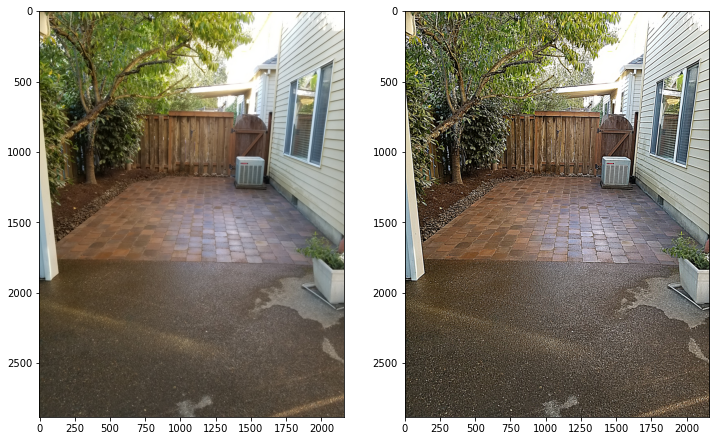

In [ ]:
# Unsharp masking (sharpening the image)
# sharp_background = original + (original - blurred) * sharpen_force
sharpen_force = 3
sharp_backyard = img + (img - blurred_backyard)*sharpen_force
display_side(img, sharp_backyard)

# one of many other methods I can use: 
# sharpen_force = 4;
# kernel = np.array([[0,-1*sharpen_force,0],[-1*sharpen_force,4*sharpen_force + 1,-1*sharpen_force],[0,-1*sharpen_force,0]])
# sharp_backyard2 = cv2.filter2D(img, -1, kernel)

3. Directional Derivative
    - Calculate the directional derivative at $45$ and $-45$ degree angles. Keep in mind that you need to handle the aspect ratio appropriately. Show the direction derivatives next to the original image 
        - Please see below
    - Fully specify how you calculated the derivative 
        - Sobel derivative calculates the derivative in x and y directions
        - Thus, I decided to create customized 2D filter to calculate the derivatives in the direction of $45$ and $-45$ degree angles, respectively. The customized kernels for $45$ and $-45$ degrees, respectively, are: 
            - $\begin{bmatrix}
0 & 1 & 2 \\
-1 & 0 & 1 \\
-2 & -1 & 0
\end{bmatrix}$ for $45$ degree, and emphasizes diagonal values
            - $\begin{bmatrix}
-2 & -1 & 0 \\
-1 & 0 & 1 \\
0 & 1 & 2
\end{bmatrix}$ for $-45$ degree, and emphasizes diagonal values
        - At each point of the image, we calculate the gradient in that point, by combinint both results above. Take absolute value of gradients at $45$ and at $-45$ degree angle, then weighted-average them to make the gradient 
    - Provide justification for your design and the parameter values that you chose 
        - Other than what's explained above, convolution operator is 3 x 3 as we need to calculate the difference between the neighboring cells, and border type was set as default (reflective) in line with the previous two problems

reference: 
- https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
- https://lilianweng.github.io/lil-log/2017/10/29/object-recognition-for-dummies-part-1.html
    

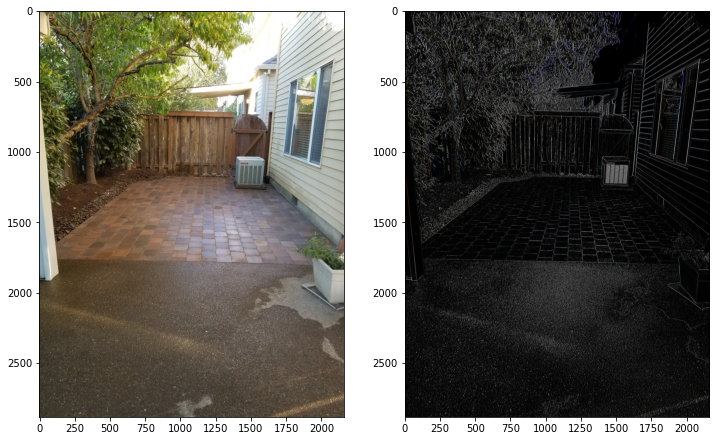

In [ ]:
# import and convert the image into gray scale 
img = cv2.imread(F'/content/gdrive/My Drive/Colab Notebooks/ComputerVision/tiles.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convolution operator to apply on the entire image matrix
kernel_pos = np.array([[0,1,2],[-1,0,1],[-2, -1, 0]])
kernel_neg = np.array([[-2, -1, 0],[-1, 0, 1],[0, 1, 2]])

# calculate the grad with respect to 45 and -45 degrees
grad_pos = cv2.filter2D(img,-1,kernel_pos)
grad_neg = cv2.filter2D(img,-1,kernel_neg)

# calculate into to make absolute values 
abs_grad_pos = cv2.convertScaleAbs(grad_pos)
abs_grad_neg = cv2.convertScaleAbs(grad_neg)

# calculate gradient of that point
grad = cv2.addWeighted(abs_grad_pos, 0.5, abs_grad_neg, 0.5, 0)

# show directional derivative
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(121)
ax.imshow(img)
ax = fig.add_subplot(122)
ax.imshow(grad)

4. Laplacian Pyramid
    - Build four-level octave Laplacian pyramid
        - Please see below
    - Explain how you performed the interpolation and justify your design decisions
        - I used Gaussian pyramid, pyrUp(), to upsample and interpolate the image.
        - Then, similar to exercise 2, I added back the small low-pass image to the upsampled blurry image, resulting in the blue band-pass image. 
    - Explain how you performed the decimation and justify your design decisions
        - I used Gaussian pyramid, pyrDown(), which uses binomial filter
        - Binomial filter is commonly used decimation filter when downsampling rate $r = 2$ (like this exercise). For higher downsampling rate, the windowed sinc pre-filter is a good choice (according to the text book)   
    - Specify what type of interpolation you used and justify your decision
        - I used the most common and widely used Gaussian interpolation (or binomial filter), because linear $[1,2,1]$ filter would give poor response (from the text book) while more complicated method would be a overdo for sampling rate is 2 and computationally inefficient. 

Gaussian Pyramid


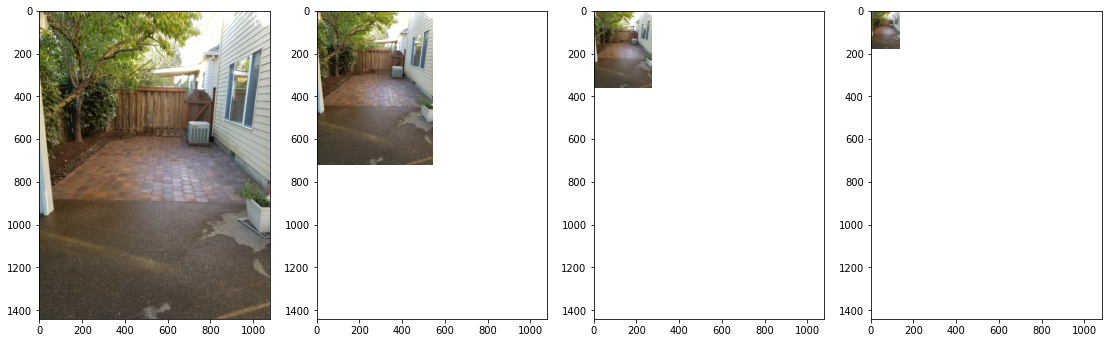

In [ ]:
layer = img.copy()
n = 4 # number of levels

# function to display an image
def display_img_6x6(img, i):
    fig = plt.figure()
    ax = fig.add_subplot(1,5,i+1)
    plt.xlim((0,1080))
    plt.ylim((1440, 0))
    ax.imshow(img)

# list to store low pass image after gaussian
gaussian_pyr = [layer]
for i in range(n + 1):
    layer = cv2.pyrDown(layer)
    gaussian_pyr.append(layer)

# show Gaussian pyramid
print("Gaussian Pyramid")
fig = plt.figure(figsize=(24,20))
for i in range(1, n+1):
    ax = fig.add_subplot(1, 5, i+1)
    plt.xlim((0, 1080))
    plt.ylim((1440, 0))
    ax.imshow(gaussian_pyr[i])

Laplacian Pyramid


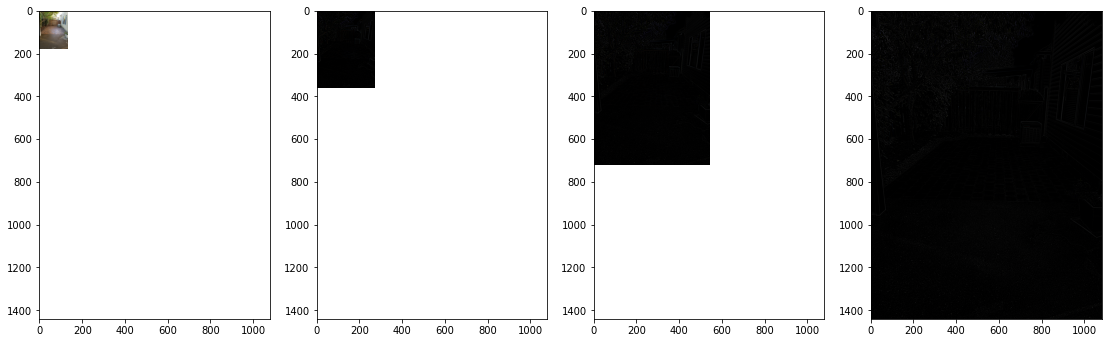

In [ ]:
# construct Laplacian pyramid 
layer = gaussian_pyr[n]
laplacian_pyr = [layer]
for i in range(n, 0, -1):
    # expand the image 
    size = (gaussian_pyr[i-1].shape[1], gaussian_pyr[i-1].shape[0])
    expanded_img = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
    # calculate laplacian layer and keep the list of it
    laplacian_layer = cv2.subtract(gaussian_pyr[i - 1], expanded_img)
    laplacian_pyr.append(laplacian_layer) 

# show Laplacian pyramid
print("Laplacian Pyramid")
fig = plt.figure(figsize=(24,20))
for i in range(n):
    ax = fig.add_subplot(1, 5, i+1)
    plt.xlim((0, 1080))
    plt.ylim((1440, 0))
    ax.imshow(laplacian_pyr[i])

Bandpass Images


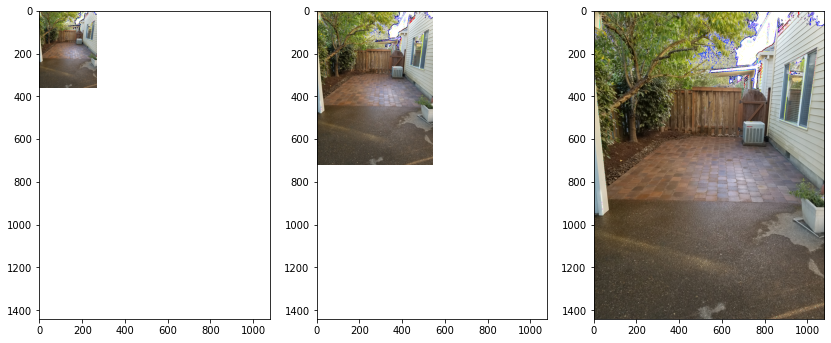

In [ ]:
# Reconstruct the images using Gaussian and Laplacian pyramids
bandpass = []
for i in range(n, 0, -1):
    bandpass_img = gaussian_pyr[n-i] + laplacian_pyr[i]
    bandpass.insert(1, bandpass_img)

# show reconstructed images
print("Bandpass Images")
fig = plt.figure(figsize=(24,20))
for i in range(1, n):
    ax = fig.add_subplot(1, 5, i+1)
    plt.xlim((0, 1080))
    plt.ylim((1440, 0))
    ax.imshow(bandpass[i])

5. Histogram Equalization
    - Perform a histogram equalization on your image. Show the original and equalized image side-by-side
        - Please see below
    - Provide a justification for how you handled the three color channels
        - Image histogram represents of the intensity distribution of an image. 
        - x-axis: intensity, y-axis: pixels
        - We can use different color space like HSV (hue, saturation, value) to separately process the intensity (focus on value channel)
        - Thus, I changed the image from BGR to HSV, then equalized the histogram on value channel only, finally converted the image from HSV to RGB. 
    - Provide a justification for the parameter values that you chose such as the bin size and how you normalized the histogram. 
        - I chose to go with the default

reference: 
- https://en.wikipedia.org/wiki/Histogram_equalization

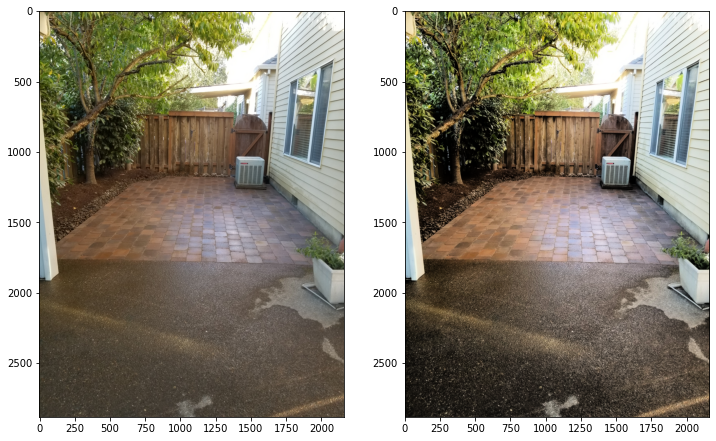

In [ ]:
# preprocess the image 
backyard = cv2.imread(F'/content/gdrive/My Drive/Colab Notebooks/ComputerVision/tiles.jpg')
backyard_rgb = cv2.cvtColor(backyard, cv2.COLOR_BGR2RGB) # BGR -> RGB
backyard_hsv = cv2.cvtColor(backyard, cv2.COLOR_BGR2HSV) # BGR -> HSV

# focus on value channel
backyard_hsv[:,:,2] = cv2.equalizeHist(backyard_hsv[:,:,2]) # equalization
backyard_eq_color = cv2.cvtColor(backyard_hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
display_side(backyard_rgb, backyard_eq_color)


Text(0.5, 1.0, 'My Backyard Image')

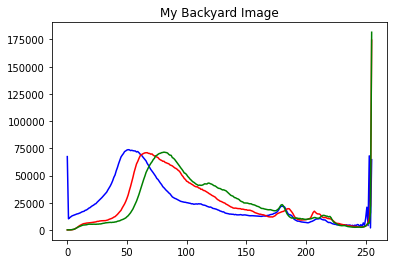

In [ ]:
# draw histogram for the image 
color = {'b', 'g', 'r'}
for i, col in enumerate(color):
    histr = cv2.calcHist([backyard], [i], None, [256], [0,256])
    plt.plot(histr,color=col)

plt.title('My Backyard Image')

Text(0.5, 1.0, 'My Backyard Image after Histogram Equalization')

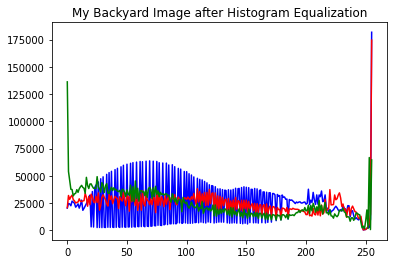

In [ ]:
# draw histogram for the image 
color = {'r', 'g', 'b'}
for i, col in enumerate(color):
    histr = cv2.calcHist([backyard_eq_color], [i], None, [256], [0,256])
    plt.plot(histr,color=col)

plt.title('My Backyard Image after Histogram Equalization')

6. Perspective Transform
    - Determine the best projective transformation that restores the image to a picture that is centered with the optical axis and does not contain any rotation, changes to aspect ratio, skew, or keystone distortion
        - The picture is the letter size paper, and aspect ratio is 8 x 11
        - As we know the four corners of the paper in the original image and how we want to move it to the output image, we first calculate the coefficients of perspective transformation (3 x 3 matrix) and plug the matrix in to the warpPerspective function, which uses forwardWarp unless flagged in the function. 
    - State the projective transform matrix (3 x 3)
        - $\begin{bmatrix}
2.88*10^{+00} & 8.65*10^{-01} & -2.39*10^{+03} \\
4.66*10^{-16} & 5.87*10^{00} & -6.45*10^{+03} \\
-3.2*10^{-05} & 2.41*10^{-03} & 1
\end{bmatrix}$ 
    - Provide a justification for how you determined the projective transform 
        - Among several transformations available, translation, rigid, similarity, and affine transformations provide not enough degree of freedom to map trapazoid into rectangle. Thus the projective transform is the best choice 

reference: 

- how to calculate coefficients of perspective transformation https://github.com/opencv/opencv/blob/master/modules/imgproc/src/imgwarp.cpp         
(line 3252 - 3273) 


[[ 2.88495340e+00  8.65486019e-01 -2.39451132e+03]
 [ 4.66407539e-16  5.86636509e+00 -6.45300160e+03]
 [-3.20017016e-05  2.41290391e-03  1.00000000e+00]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


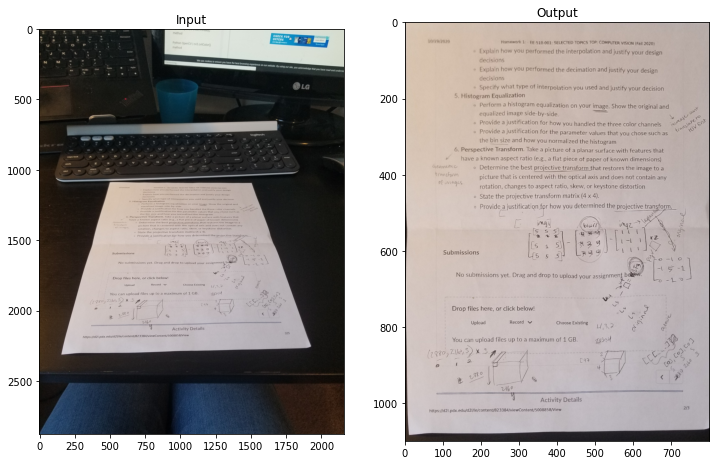

In [ ]:
paper = cv2.imread(F'/content/gdrive/My Drive/Colab Notebooks/ComputerVision/paper.jpg')
paper = cv2.cvtColor(paper, cv2.COLOR_BGR2RGB)
rows, cols, ch = paper.shape

pts1 = np.float32([[500,1100],[1500,1100],[125,2350],[1950,2330]])
pts2 = np.float32([[0,0],[800,0],[0,1100],[800,1100]])

M = cv2.getPerspectiveTransform(pts1, pts2)
print(M)
dst = cv2.warpPerspective(paper, M, (800, 1100), cv2.WARP_INVERSE_MAP)

display_side(img, dst)

plt.subplot(121),plt.imshow(paper),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()